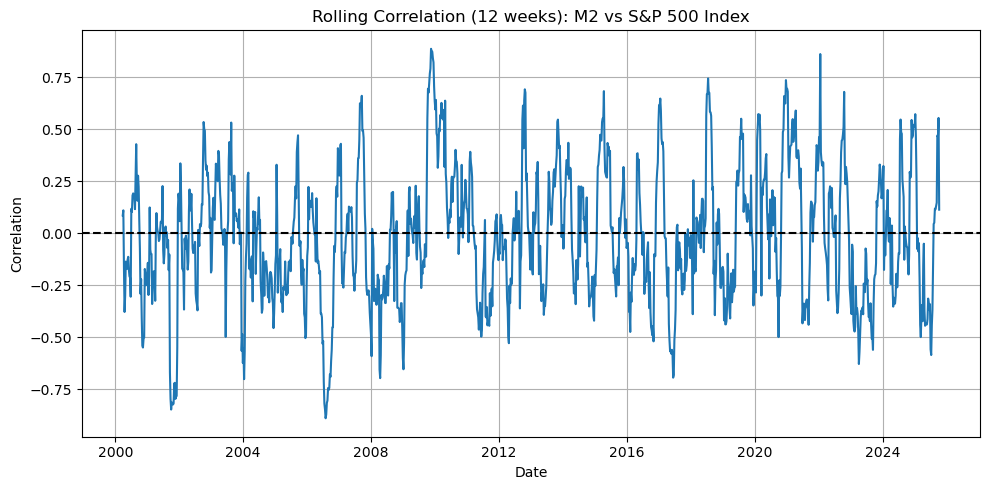

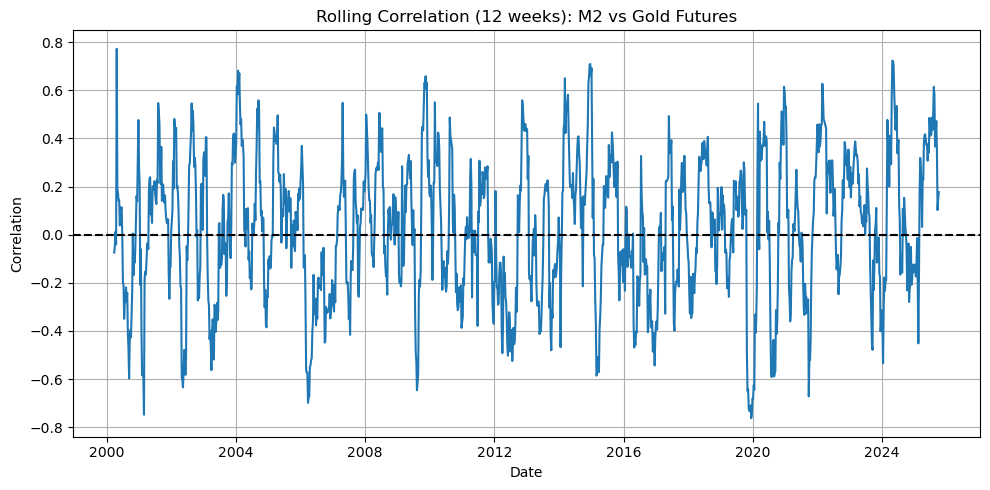

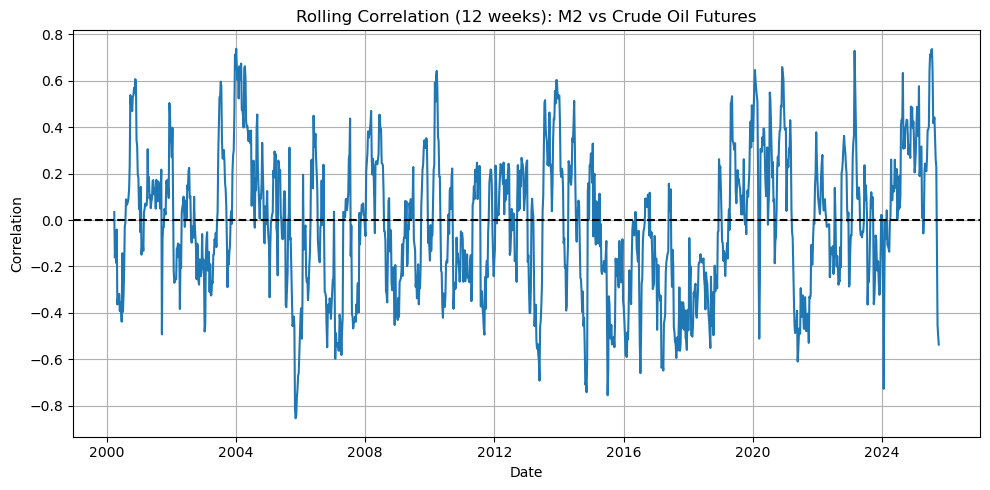

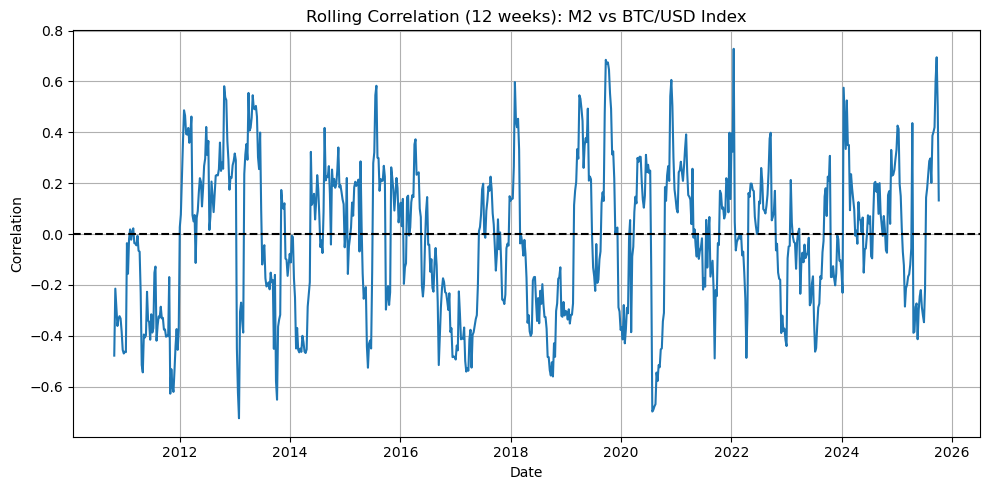

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# Config: File path and rolling correlation settings
FILE = Path("/Users/babo/Downloads/Group-project-Data_Percent_Changes.csv")
WINDOW_WEEKS = 12              # 12 weeks ≈ one quarter
date_col = "Date"              


# Load the CSV file
df = pd.read_csv(FILE)


# Convert the Date column to datetime
# Convert string dates into proper datetime objects
df[date_col] = pd.to_datetime(df[date_col], format="%Y-%m-%d", errors="coerce")

# Sort rows by date to make rolling windows work correctly
df = df.sort_values(date_col).reset_index(drop=True)

# Convert all other columns to numeric (safety step to avoid errors)
for c in df.columns:
    if c != date_col:
        df[c] = pd.to_numeric(df[c], errors="coerce")


# Identify M2 column and asset columns
# Find the column that contains "m2" in its name
m2_candidates = [c for c in df.columns if "m2" in c.lower()]
if not m2_candidates:
    raise ValueError("Could not find the M2 column.")
m2_col = m2_candidates[0]

# Assets we want to analyze
assets = [
    "S&P 500 Index",
    "Gold Futures",
    "Crude Oil Futures",
    "BTC/USD Index"
]

# Keep only the assets that are actually in the dataset
assets = [c for c in assets if c in df.columns]


# Compute rolling correlations: corr(M2, Asset) over last WINDOW_WEEKS
df_roll = df[[date_col]].copy()  # new dataframe with only the date at first

for asset in assets:
    # Rolling correlation inside each 12-week window
    df_roll[asset] = df[m2_col].rolling(WINDOW_WEEKS).corr(df[asset])

# Plot each rolling correlation separately
for asset in assets:
    plt.figure(figsize=(10, 5))
    plt.plot(df_roll[date_col], df_roll[asset])
    plt.axhline(0, linestyle="--", color="black")  # baseline for interpretation

    plt.title(f"Rolling Correlation ({WINDOW_WEEKS} weeks): M2 vs {asset}")
    plt.xlabel("Date")
    plt.ylabel("Correlation")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
